# Efficient Compressed Sensing SENSE pMRI Reconstruction With Joint Sparsity Promotion
Il Yong Chun, Ben Adcock, and Thomas M. Talavage, 2015

## Notation

For easy reference, below lists the extensive notations used in the paper.

| Symbol                       | $\in$               | Description                                            |
|------------------------------|---------------------|--------------------------------------------------------|
|$\mathbf{x}$                  |$\mathbb{C}^N$       |The target magnetic resonance image to be reconstructed |
|$N$                           |$\mathbb{R}$         |The length of the vectorised MRI|
|$\mathbf{y_i}$                |$\mathbb{C}^N$       |A vectorised k-space from one coil|
|$\mathbf{y}$                  |$\mathbb{C}^{NC}$    |The concatenated vectorised coil k-spaces|
|$C$                           |$\mathbb{R}$         |The number of coils|
|$\mathbf{s_c}$                |$\mathbb{C}^N$       |The sensitivty profile for the $c^{th}$ coil|
|$\mathbf{S_c}$                |$\mathbb{C}^{N\times N}$   |The diagonalised sensitivty profile for the $c^{th}$ coil|
|$\mathbf{S}$                  |$\mathbb{C}^{NC\times N}$  |The concatenated diagonalised sensitivty profiles|
|$\mathbf{n}_c$                |$\mathbb{C}^{N}$     |A noise vector from the $c^{th}$ coil|
|$\mathbf{n}$                  |$\mathbb{C}^{NC}$    |The concatenated noise vectors|
|$\Phi$                        |$\mathbb{C}^{N\times N}$   |A full DFT matrix |
|$\mathbf{P_{\Omega}}$         |$\mathbb{Z}^{N\times N}$   |A diagonal sampling matrix with $m^{th}$ entry equal to one if $m\in\Omega$|
|$M$                           |$\mathbb{Z}$          |$|\Omega| << N$, the number of rows subsampled by $\mathbf{P_{\Omega}}$  |
|$\mathbf{P_{\Omega}\Phi}$     |$\mathbb{C}^{N\times N}$   |A partial DFT matrix |
|$\mathbf{I}_c$                |$\mathbb{Z}^{C\times C}$   |The identity matrix |
|$\mathbf{F_{\tilde{\Omega}}}$ |$\mathbb{C}^{NC\times NC}$ |$\mathbf{I}_c \otimes \mathbf{P_{\Omega}\Phi}$, a partial DFT matrix for vector operations|
|$\mathbf{\Psi}$               |$\mathbb{C}^{N\times N}$   |A sparsifying transform, e.g. the Discrete Daubechies Transform |
|$\mathbf{\Psi}_c$             |$\mathbb{C}^{NC\times NC}$ |$\mathbf{I}_c \otimes\mathbf{\Psi}$, A sparsifying transform for vector operations|
|$\mathbf{G}_1$                |$\mathbb{C}^{N\times N}$   |A horizontal direction gradient transform|
|$\mathbf{G}_2$                |$\mathbb{C}^{N\times N}$   |A vertical direction gradient transform|
|$\mathbf{G}_{1,c}$            |$\mathbb{C}^{NC\times NC}$ |$\mathbf{I}_c\otimes\mathbf{G}_1$, A horizontal direction gradient transform for vector operations|
|$\mathbf{G}_{2,c}$            |$\mathbb{C}^{NC\times NC}$ |$\mathbf{I}_c\otimes\mathbf{G}_2$, A vertical direction gradient transform for vector operations|
|$\mu(U)$                      |                     |$max_{m,n}|U_{m,n}| \in [1/\sqrt{N},1]$,  Mutual Coherence|
|$$||\psi||_{2,1}$$              |                   |$\sum_{n=1}^N\sqrt{\sum_{c=1}^C|\psi_{nc}|^2}$,  $l_{2,1}$-norm |


<!-- |$$|$\mathbb{C}^{}$||
|$$|$\mathbb{C}^{}$||
|$$|$\mathbb{C}^{}$||
|$$|$\mathbb{C}^{}$||
|$$|$\mathbb{C}^{}$||
|$$|$\mathbb{C}^{}$||
|$$|$\mathbb{C}^{}$||
|$$|$\mathbb{C}^{}$||
|$$|$\mathbb{C}^{}$||
|$$|$\mathbb{C}^{}$||
|$$|$\mathbb{C}^{}$||
|$$|$\mathbb{C}^{}$||
|$$|$\mathbb{C}^{}$|| -->

## Models
This paper also provides background on some relevant and similar models developed previously.

### SENSE pMRI System Model

The basic system model, from the perspective of SENSE, for Parallel MRI (pMRI) is:

$$\mathbf{y} = \mathbf{F}_{\tilde{\Omega}}\mathbf{Sx} + \mathbf{n} \tag{1}$$

This leads to reconstruction via the convex optimisation problem:

$$\underset{x}{\arg\min}||\mathbf{\Psi x}||_1 \;\; \mathrm{S.T.} \;\; \mathbf{y} = \mathbf{P_{\Omega}\Phi x} \tag{2}$$

In such a case, $\mathbf{x}$ can be perfectly reconstructed with a high probability if $x$ is $s$-sparse and:

$$M \ge k\mu(\Phi\Psi^{-1})Nslog(N) \tag{3}$$

__Question:__ _a barrier in the performance of CS when the samples are drawn uniformly at random. Fortunately, the DFT and DDT pair is asymptotocally incoherent and this property allows ones to overcome this barrier by sampling according to a nonuniform density_

### Coil-by-Coil CS pMRI Reconstruction

In coil-by-coil methods, the basic pMRI problem is applied to each coil separately. 

$$\underset{x_c \in \mathbb{C}^{NC}}{\arg\min}||\mathbf{\Psi_cx_c}||_1 \;\; \mathrm{S.T.} \;\; ||\mathbf{y}-\mathbf{F_{\tilde{\Omega}}x_c}||_2^2<\delta \tag{4}$$

This recovers individual coil images which are then recombined using Sum of Squares. 

### CS SENSE pMRI Reconstruction

The basic CS SENSE pMRI problem, with a single image target is:

$$\underset{x\in\mathbb{C}^N}{\arg\min}||\mathbf{\Psi x}||_1 \;\; \mathrm{S.T.} \;\; ||\mathbf{y}-\mathbf{F_{\tilde{\Omega}}Sx}||_2^2 < \delta \tag{5}$$

### Joint Sparsity CS SENSE pMRI Reconstruction

The proposed reconstruction method exploits cross-channel dependencies through the joint sparsity of Wavelet coefficients in the same spatial positions. Previously, the coils are treated independantly. This approach employs the $l_{2,1}$ norm, which computes the $l_1$-norm of the $l_2$-norm-averaged coil images.

$$\underset{x\in\mathbb{C}^N}{\arg\min}||\mathbf{\Psi_c Sx}||_{2,1} \;\; \mathrm{S.T.} \;\; ||\mathbf{y}-\mathbf{F_{\tilde{\Omega}}Sx}||_2^2 < \delta \tag{6}$$

#### Multiple Sparsifying Transformations

This approach can additionally include regularisation terms such as Total Variation (TV) mininmisation terms. This is formulated as:

$$\underset{x\in\mathbb{C}^N}{\arg\min}||\mathbf{\Psi_c Sx}||_{2,1} + ||\mathbf{G_{1,c}Sx}||_{2,1} + ||\mathbf{G_{2,c}Sx}||_{2,1} s.t. ||\mathbf{y}-\mathbf{F_{\tilde{\Omega}}Sx}||_2^2 < \delta \tag{7}$$

## Algorithmic Formulation

The JS CS SENSE pMRI Reconstruction optimisation problem posed in (6) can be split into two unconstrained optimisation problems.

$$x^{(k+1)} = \underset{x^{(k)}}{\arg\min}||\mathbf{\Psi_cSx^{(k)}}||_{2,1} + \frac{\alpha}{2}||\mathbf{y}^{(k)}-\mathbf{F_{\tilde{\Omega}}Sx}^{(k)}||_2^2 \tag{8}$$

$$\mathbf{y}^{(k+1)} = \mathbf{y}^{(k)} + \mathbf{y} - \mathbf{F_{\tilde{\Omega}}Sx}^{(k+1)} \tag{9}$$

The problem from (8) can be refactored as:

$$x^{(k+1)} = \underset{x^{(k)}}{\arg\min}||\mathbf{d_{\Psi}^{(k)}}||_{2,1} + \frac{\alpha}{2}||\mathbf{y}^{(k)}-\mathbf{F_{\tilde{\Omega}}d_s}^{(k)}||_2^2 \tag{10}$$

subject to:

$$\mathbf{d}_s^{(k)} = \mathbf{Sx}^{(k)} \;\; \mathrm{and} \;\; \mathbf{d}_{\Psi}^{(k)} = \mathbf{\Psi}_c\mathbf{d}_s^{(k)}$$


The problem from (10) can be split into three unconstrained optimisation problems, similar to (8).

$$\Big(\mathbf{x}^{(k+1)}, \mathbf{d_s}^{(k+1)}, \mathbf{d_\Psi}^{(k+1)}\Big) = \underset{\mathbf{x}^{(k)}, \mathbf{d_s}^{(k)}, \mathbf{d_\Psi}^{(k)}}{\arg\min}
||\mathbf{d_\Psi}^{(k)}||_{2,1} + 
\frac{\alpha}{2}||\mathbf{y}^{(k)}-\mathbf{F_{\tilde{\Omega}}d_s}^{(k)}||_2^2 + 
\frac{v}{2}||\mathbf{d}_s^{(k)} - \mathbf{Sx}^{(k)} -\mathbf{b}_s^{(k)}||_2^2 + 
\frac{\beta}{2}||\mathbf{d}_\Psi^{(k)} - \mathbf{\Psi_cd_s}^{(k)} -\mathbf{b}_\Psi^{(k)}||_2^2 \tag{11}$$



$$\mathbf{b}_s^{(k+1)} = \mathbf{b}_s^{(k)} + \mathbf{Sx}^{(k+1)} - \mathbf{d}_s^{(k+1)} \tag{12}$$

$$\mathbf{b}_\Psi^{(k+1)} = \mathbf{b}_\Psi^{(k)} + \mathbf{\Psi_cd_s}^{(k+1)} - \mathbf{d}_\Psi^{(k-1)}\tag{13}$$

The problem from (11) can be solved by iteratively minimising $\mathbf{x}^{(k)}$, $\mathbf{d_s}^{(k)}$ and $\mathbf{d_\Psi}^{(k)}$ respectively. For this, the relevant terms in (11) are extracted for each minimisation, yielding (14), (15), (16). 

$$\mathbf{x}^{(k+1)} = \underset{\mathbf{x}^{(k)}}{\arg\min}||\mathbf{d}_s^{(k)} - \mathbf{Sx}^{(k)} -\mathbf{b}_s^{(k)}||_2^2 \tag{14}$$

$$\mathbf{d_s}^{(k+1)} = \underset{\mathbf{d_s}^{(k)}}{\arg\min} \frac{\alpha}{2}||\mathbf{y}^{(k)}-\mathbf{F_{\tilde{\Omega}}d_s}^{(k)}||_2^2 + 
\frac{v}{2}||\mathbf{d}_s^{(k)} - \mathbf{Sx}^{(k)} -\mathbf{b}_s^{(k)}||_2^2 + 
\frac{\beta}{2}||\mathbf{d}_\Psi^{(k)} - \mathbf{\Psi_cd_s}^{(k)} -\mathbf{b}_\Psi^{(k)}||_2^2 \tag{15}$$

$$\mathbf{d_\Psi}^{(k+1)} = \underset{\mathbf{d_\Psi}^{(k)}}{\arg\min} ||\mathbf{d_\Psi}^{(k)}||_{2,1} + \frac{\beta}{2}||\mathbf{d}_\Psi^{(k)} - \mathbf{\Psi_cd_s}^{(k)} -\mathbf{b}_\Psi^{(k)}||_2^2 \tag{16}$$


(14) has the simple closed form solution:
$$\mathbf{x}^{(k+1)} = (\mathbf{S}^H\mathbf{S})^{-1}\mathbf{S}^H(\mathbf{d}_s^{(k)}-\mathbf{b}_s^{(k)}) \tag{17}$$

(15) has the most complex solution of the iteration parts, specifically:

$$ \mathbf{d}_s^{(k+1)} = \big(\alpha\mathbf{F}_{\tilde{\Omega}}^H\mathbf{F}_{\tilde{\Omega}} + (\beta+v)\mathbf{I}\big)^{-1}
\big(\alpha\mathbf{F}_{\tilde{\Omega}}^H\mathbf{y}^{(k)} + \beta\mathbf{\Psi}_C^H(\mathbf{d}_\Psi^{(k)}-\mathbf{b}_\Psi^{(k)}) + v(\mathbf{Sx}^{(k)} +\mathbf{b}_s^{(k)})\big)$$

$$ \mathbf{d}_s^{(k+1)} = \mathbf{\Psi}_C^H\big(\alpha\mathbf{P}_{\tilde{\Omega}}^T\mathbf{P}_{\tilde{\Omega}} + (\beta+v)\mathbf{I}\big)^{-1}\mathbf{\Psi}_C
\big(\alpha\mathbf{F}_{\tilde{\Omega}}^H\mathbf{y}^{(k)} + \beta\mathbf{\Psi}_C^H(\mathbf{d}_\Psi^{(k)}-\mathbf{b}_\Psi^{(k)}) + v(\mathbf{Sx}^{(k)} +\mathbf{b}_s^{(k)})\big)  \tag{18}$$

(16) can be solved with a variant of soft shrinkage for joint sparsity. This operator is defined as:

$$Jsoftshrink(\mathbf{\hat{x}}, \gamma) = (\mathbf{\hat{x}}/||\mathbf{\hat{x}}||_2)\max(||\mathbf{\hat{x}}||_2-\gamma, 0) \tag{19}$$

This is applied to solve (16):

$$\mathbf{d_\Psi}^{(k+1)} = Jsoftshrink\big(\mathbf{\Psi}_C\mathbf{d}_S^{(k+1)} + \mathbf{b}_\Psi^{(k)}, \tfrac{1}{\beta}\big) \tag{20}$$

## Recovery Guarantees

### Coil-by-Coil CS pMRI Reconstruction

Let 

$$s_c = \parallel\mathbf{\Psi x_c}\parallel_0 $$

be the sparsity in the $c^{th}$ coil and $M_c$ the number of Measurements in the $c^{th}$ coil.

Then, the standard Compressed Sensing result tells us that

$$M_c  \gtrsim s_c N \mu(\mathbf{\Phi\Psi^H})^2log(N) \tag{21}$$

,where $\mu(\mathbf{\Phi\Psi^H})$ denotes the mutual coherence.

Assuming, that 

$$\mu(\mathbf{\Phi\Psi^H}) \leq \frac{\eta}{N}$$

,the total number of measurements $M = \sum_c M_c$ satisfies

$$M  \gtrsim \eta \left( \sum_c s_c \right) log(N). \tag{22}$$

In practice, the coils aquire the same amount of data simultaneously. Hence,
the recovery guarantee can be reformulated to 

$$M  \gtrsim \eta C \left(\max_c s_c \right) log(N). \tag{23}$$

Due to the linearity in $C$, we expect realtively worse performance at high resolution.

In the case of perfectly disjoint sensitivities it is reasonable to expect 

$$s_c \approx \frac{s}{C},$$

which directly leads to the measurement condition,

$$M  \gtrsim \eta s log(N). \tag{24}$$

Now the condition is linear in $s$ and independent of the number of coils $C$.
However, this situation is not realizable, the coil sensitivites $S_c$ usually have support of size $N_c \approx N$, which indicates how much larger (22) is over (24).

### CS SENSE pMRI Reconstruction

Under certain symplifing assumptions we can expect the same measurement condition 

$$M  \gtrsim \eta C s log(N) \tag{25}$$

in the general case and 

$$M  \gtrsim \eta s log(N) \tag{26}$$

for the disjoint sensitivities case.

### JS CS SENSE pMRI Reconstruction

The relaxed model

$$ argmin_{z_c \in \mathbb{C^N} } \|\mathbf{z_c}\|_1 $$ 

$$ s.t. \mathbf{P_{\Omega}} \mathbf{\Phi} \mathbf{\Psi^H} \mathbf{z_c} = \mathbf{y_c}$$  

$$argmin_{x \in \mathbb{C^N}} \|\mathbf{\Phi_C} \mathbf{Sx} - [\mathbf{z_1^H,...,z_C^H}] \|_2 \tag{27}$$

becomes the coil-by-coil reconstruction, while the reconstruction is not obtained by the SoS but from the optimization problem from (27).

Due to similarity to the coil-by-coil approach, we can directly deduce that

$$M  \gtrsim \eta C \left(\max_c s_c \right) log(N). \tag{28}$$

in the general case and 

$$M  \gtrsim \eta s log(N) \tag{29}$$

for the disjoint sensitivities case.

### Summary

The joint sparsity model needs less measurements than the standard CS model and the same as the coil-by-coil method. 
Due to the optimization problem instead of the SoS, the JS CS model is expected to have a lower error.

## Residual- JS Regularized Sensitivity Estimation and CaL JS CS SENSE Reconstruction

Aim to determmine the sensitvity maps.

Basic Framework:

1) reconstruct multiple surface-coil images $\mathbf{x_C^*}$ with coil-by-coil reconstruction and a single volume-coil image $\mathbf{x_0^*}$ by the conventional CS model

2) rough sensitivity profiles are aquired by dividing the surface-coil images by the volume-coil image

3) The rough maps are refined by sinusoidal fitting, for realistic maps

The major problem of the above prodecure occurs at the division by low density signals in $\mathbf{x_0^*}$.
In order to overcome this problem, the following residual based optimzation problem,

$$ argmin_{\mathbf{r} \in \mathbb{C^{PC}} } \|\mathbf{\Psi_C}(\mathbf{x_C^* - Xr})\|_{2,1} \tag{30}$$ 

$$ s.t. \| \mathbf{x_C^* - Xr}\|_2^2 < \delta$$

accurately estimates the coefficients $\mathbf{r} = [\mathbf{r_1^H},..,\mathbf{r_C^H}]$of the sinusoidal fit. 

Here $ \mathbf{X} = \oplus_{c \in [C]} (\mathbf{x_0^*})\mathbf{R}$, where $\mathbf{R} \in \mathbb{C}^{NxP}$ is the mapping of the coefficients to the data and $P$ is the number of coefficients.

Once the $c^th$ coefficient vector $\mathbf{r_c^*}$ is estimated from (30), its corresponding sensitivity profile is produced by the relation $\mathbf{s_c^*} = \mathbf{Rr}_c^*$.
 

## Julia Implementation

In [1]:
using LinearAlgebra, MAT, FFTW, Wavelets, Random, Plots, PyPlot

In [2]:
using SparseArrays

In [3]:
using Distributions 

In [4]:
using Images

### Initialisation

In [623]:
# Load data 
file = matopen("data/brain_coil.mat");
coilScans = read(file, "brain_coil_tmp");
close(file);
file = matopen("data/coil_sensitivity_map.mat");
coilSensitivityMaps = read(file, "coil_map");
close(file);

# # K-spaces
# cs = zeros(64,64,5)
# for i = 1:5
#     cs[:,:,i] =  imresize(coilScans[:,:,i], (64, 64));
# end
# coilScans = cs;
# sm = zeros(64,64,5)
# for i = 1:5
#     sm[:,:,i] =  imresize(coilSensitivityMaps[:,:,i], (64, 64));
# end
# coilSensitivityMaps = sm;
height, width, C = size(coilScans);
N = height*width; # Length of vectorised images

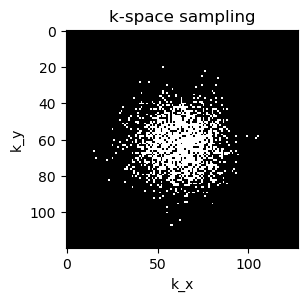

In [701]:

# Simulate k-space sampling
# Here we sample in Gaussian distributed fashion
lb = 1    # The truncation lower bound
ub = height    # The truncation upper bound
mu = trunc(Int32, min(height,width)/2+abs(height-width)/2)    # The mean of the truncated Normal
sigma = 12 # The standard deviation of the truncated Normal
d = Truncated(Normal(mu, sigma), lb, ub)  #Construct the distribution type

samp = 2000 # Number of samples
ind = trunc.(Int64, rand(d, samp,2)); # Indices of samples (possibly duplicated coordinates here)

A = zeros(height,width)
for i = 1: samp
    A[ind[i,1],ind[i,2]] = Int(1)
end
# A = A.==1 # Turn into logical matrix
# A = circshift(A, trunc(Int32, height/2))
# A = circshift(A', trunc(Int32, width/2))'

# ind = findall(x->x==true, A); # Find indices of entries in A where the entry is not 0, now indices are unique



figure(figsize=(3,3))
imshow(A, cmap = "gray")
xlabel("k_x")
ylabel("k_y")
title("k-space sampling");

P_Omega = A;

### Utility functions 

In [702]:
# height = 3;
# width = 3;
# C = 2;
# x = rand(height,width,C)  # Example for verification purposes
# P_Omega = ones(height, width)

In [717]:
# Operators, Notation as in Paper
function SoS(x)
    x = sum(abs.(x).^2, dims = 3)
    return sqrt.(x)
end

function Jsoftshrink(x, lambda)
   return (x./norm(x)) .* max(norm(x) - lambda, 0)
end

function Psi(x)
    return dwt(x, wavelet(WT.db4));
end
function Psi_H(x)
    return idwt(x, wavelet(WT.db4));
end
function Phi(x)
    return fftshift(fft(x));
end
function Phi_H(x)
    return ifft(ifftshift(x));
end
function Phi_c(x)
    y = zeros(height,width,C).+0*im
    for i = 1:C
        y[:,:,i] = Phi(x[:,:,i]);
    end
    return y
end
function Phi_cH(x)
    y = zeros(height,width,C).+0*im
    for i = 1:C
        y[:,:,i] = Phi_H(x[:,:,i]);
    end
    return y
end
function Psi_c(x)
    y = zeros(height,width,C).+0*im
    for i = 1:C
        y[:,:,i] = Psi(x[:,:,i]);
    end
    return y
end
function Psi_cH(x)
    y = zeros(height,width,C).+0*im
    for i = 1:C
        y[:,:,i] = Psi_H(x[:,:,i]);
    end
    return y
end
function F_Omega_c(x)
    y = zeros(height,width,C).+0*im
    for i = 1:C
        y[:,:,i] = P_Omega.*Phi(x[:,:,i]);
    end
    return y
end
function F_Omega_cH(x)
    y = zeros(height,width,C).+0*im
    for i = 1:C
        y[:,:,i] = Phi_H(P_Omega.*x[:,:,i]);
    end
    return y
end;
# norm(Phi_c(Phi_cH(x)) - x)
# norm(Psi_c(Psi_cH(x)) - x)
# norm(F_Omega_c(F_Omega_cH(x)) - x)

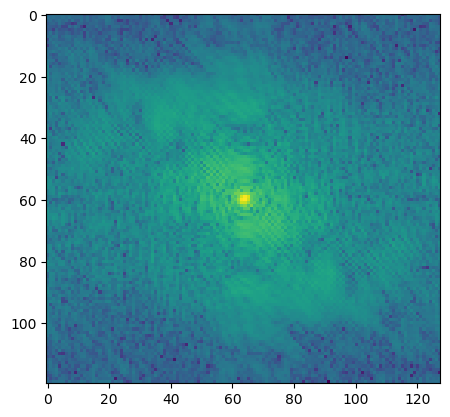

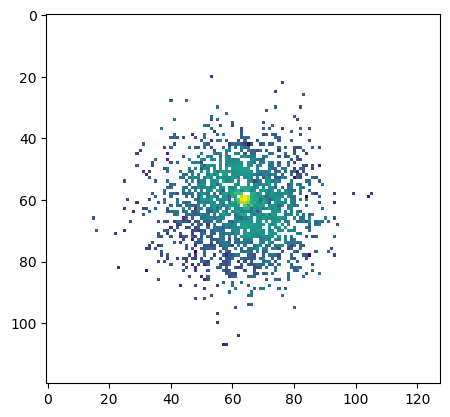

In [735]:
# Simulate K-Space data
y_original = Phi(coilScans); # Full K-Space data of vectorised coil images


y_data = P_Omega.*(y_original + 1*randn(height, width, C)); # Added some noise
PyPlot.imshow(log.(abs.(y_original[:,:,2])))
figure()
PyPlot.imshow(log.(abs.(y_data[:,:,2])))

S = coilSensitivityMaps;

In [736]:
# Define operator inv(S^H S) S^H
inv_SHS = 1 ./sum(S.^2, dims = 3);
inv_SHS_SH = inv_SHS .* S
function apply_inv_SHS_SH(x)
    return sum(inv_SHS_SH.*x, dims = 3);
end;
# function apply_inv_SHS_SH(x)
#     return inv_SHS_SH.*x;
# end;

In [749]:
# Define hyperparameters 
α = 0.05;
β = 0.1;
ν = 0.1;
nInner = 1; # Number of inner Bregman iterations 
nOuter = 100; # Number of outer Bregman iterations 
# delta = # Alternatively can define threshold for stopping condition instead of nOuter

In [750]:
# Precompute Lambda
inv_Lambda = 1 ./(α*P_Omega.^2 .+ (β + v))
# Define Operator inv(Lambda)
function apply_invLambda(x)
     return inv_Lambda.*x;
end

apply_invLambda (generic function with 1 method)

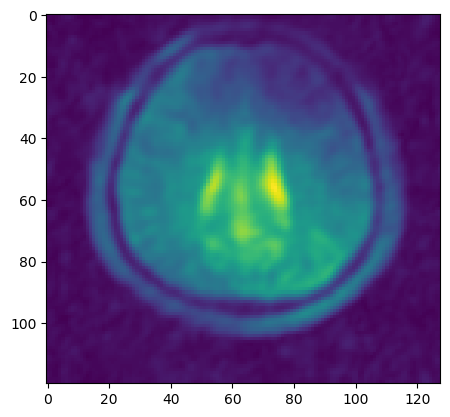

In [751]:
# Initialise values  
y = y_data;
x = SoS(Phi_cH(y));
imshow(abs.(x[:,:,1]))

# ds = rand(height,width,C);
# dpsi = rand(height,width,C);
# bs = rand(height,width,C);
# bpsi = rand(height,width,C);
ds = zeros(height,width,C);
dpsi = ds;
bs = ds;
bpsi = ds;
Sx = S.*x;

### SENSE pMRI reconstruction with JS, without the total variation regularization

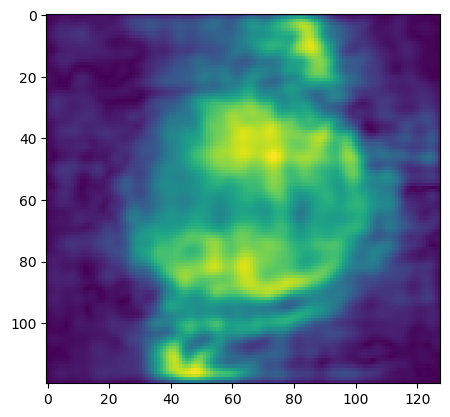

||y-y_data|| = 4.0080808338266015e18

In [752]:
for nOut = 1:nOuter
    for nIn = 1:nInner
        x = apply_inv_SHS_SH(ds - bs); # SOS init will get canceled here
        ds = Phi_cH(apply_invLambda(Phi_c(α*F_Omega_cH(y) + β*Psi_cH(dpsi-bpsi) + ν*(S.*x+bs))));
        dpsi = Jsoftshrink(Psi_c(ds) + bpsi, 1/β);
        bs = bs + Sx - ds;
        bpsi = bpsi + Psi_c(ds) - dpsi;
    end
    y = y + y_data - F_Omega_c(S.*x);
end

print("||y-y_data|| = ",norm(y-y_data))

PyPlot.imshow(SoS(x)[:,:,1]);